## Spring pendulum

This notebook lets you experiment with the spring pendulum.

Note that it employs a simplisitic Newtonian approach in a Cartesian coordinate system!


In [1]:

%run ./.setup.ipynb
##%matplotlib notebook
%matplotlib widget


Setup complete


In [2]:
def dydt(y,t,k,m,L,g):
    """
    ODE spring pendulum natural length L: t argument required but not used
    Choosing origin at axis of pendulum and y in upward sense => atan2 value of theta requires shift by pi/2
    """
    r=math.sqrt(y[0]**2+y[2]**2)
    th=math.pi/2+math.atan2(y[2],y[0]) # theta wrt vertical, pos to right
    om2=k/m
    f = [y[1],
         -om2*(r-L)*math.sin(th),
         y[3],
         om2*(r-L)*math.cos(th) -g]
    
    return f

In [3]:
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint
import math

g=9.81
m=1
k=10
L=1.0

th0= 0.8 * math.pi/2  # initial position here
r0=L+1


y0=np.zeros(4)
y0[0]=r0*math.sin(th0)
y0[1]=0                      #assuming initial zero velocity
y0[2]=-r0*math.cos(th0)
y0[3]=0                      #assuming initial zero velocity


y1=np.zeros(4)

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 100.0
numpoints = 1000

t,dt=np.linspace(0,stoptime,numpoints,retstep=True)

# Call the ODE solver.
y1 = odeint(dydt, y0, t, args=(k,m,L,g,),
              atol=abserr, rtol=relerr)


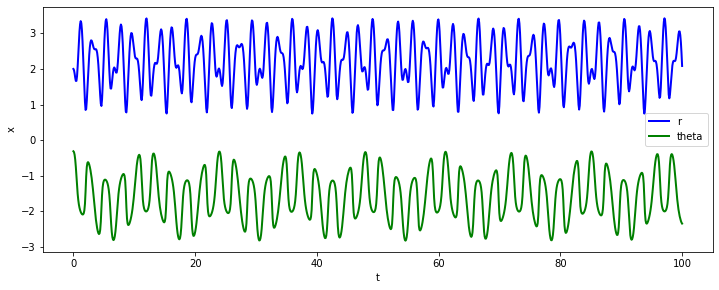

In [4]:
# Plot the solution that was generated: wsol[:,x1,y1,x2,y2]

plt.figure(1, figsize=(12, 4.5))

plt.xlabel('t')
plt.ylabel('x')
lw = 2

plt.plot(t, np.sqrt(y1[:,0]**2+y1[:,2]**2), 'b', linewidth=lw,label='r')
plt.plot(t, np.arctan2(y1[:,2],y1[:,0]), 'g', linewidth=lw,label='theta')
plt.legend();





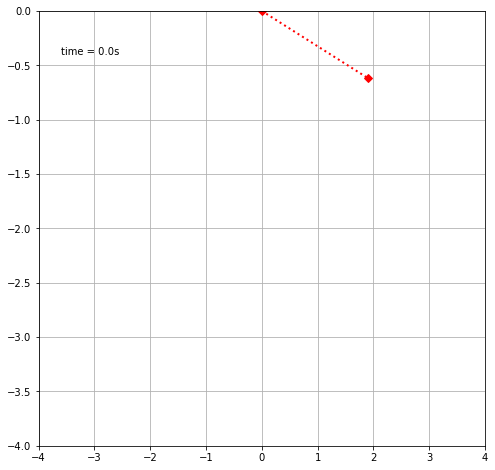

In [8]:
#Adapted from https://matplotlib.org/3.3.0/gallery/animation/double_pendulum.html

import matplotlib.animation as pltani

xp1 = y1[:,0]    # Mass 1 x coordinate
yp1 = y1[:,2]    #Mass 1 y coordinate

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-4, 4), ylim=(-4, 0.))
#ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'D:', lw=2,c='r')
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def animate(i):
    thisx = [0, xp1[i]]
    thisy = [0, yp1[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text


ani = pltani.FuncAnimation(fig, animate, len(y1), interval=dt*1, blit=True)


# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#fps=10
#ani.save('springpendulum.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])


plt.show()






### Inspection of action

In the following cells, we will take a look at the form of the kinetic and potential energies.

From there we can see the integrated action as a function of time for the particular case shown.


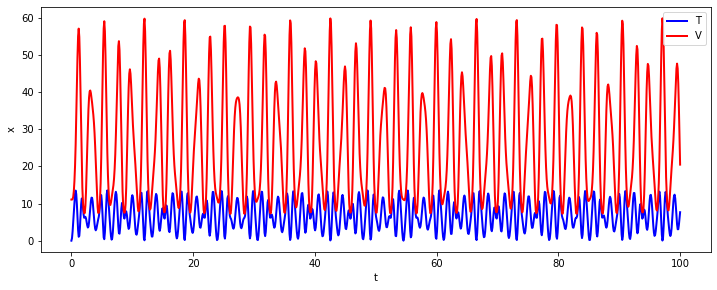

In [6]:
#Action

T= 0.5*m*(y1[:,1]**2+y1[:,3]**2)
V= -m*g*y1[:,2] +0.5*k*(np.sqrt(y1[:,0]**2+y1[:,2]**2)-L)**2
cumulativeL=np.cumsum(T-V)


plt.figure(2, figsize=(12, 4.5))

plt.xlabel('t')
plt.ylabel('x')
lw = 2
plt.plot(t, T, 'b', linewidth=lw,label='T')
plt.plot(t, V, 'r', linewidth=lw,label='V')
plt.legend();

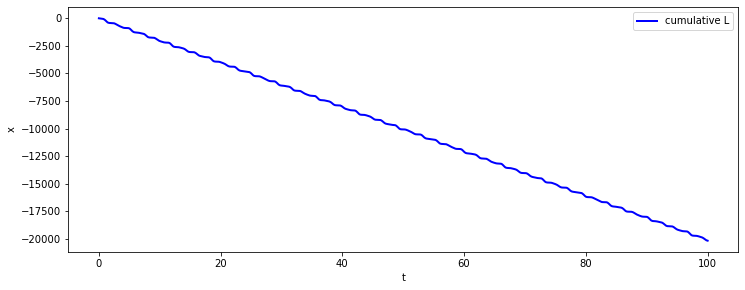

In [7]:

plt.figure(3, figsize=(12, 4.5))
plt.xlabel('t')
plt.ylabel('x')
lw = 2
plt.plot(t, cumulativeL, 'b', linewidth=lw,label='cumulative L')
plt.legend();
